# A simple SEA model of two beams

In [1]:
import sys
import seapy
import numpy as np
%matplotlib inline

## Creating a SEA model

To create a SEA model we begin by creating an instance of `Model`.

In [2]:
from acoustics.signal import OctaveBand

frequency = OctaveBand(fstart=500.0, fstop=8000.0, fraction=1)
system1 = seapy.system.System(frequency)

We are only interested in a limited frequency range.

An important parameter of a component is the type of which it is made. Let's create steel beams.

In [3]:
steel = system1.add_material('steel', 
                             'MaterialSolid', 
                             young=1.0e7, 
                             poisson=0.30, 
                             density=8.0e3,
                             loss_factor=np.ones(len(system1.frequency.center))*0.2
                            )

While we gave certain quantities as arguments, we can also assign them later on.

In [8]:
steel.density = 2000.0

We now create two almost similar beams.

In [9]:
beam1 = system1.add_component(
    'beam1',               
    'Component1DBeam',
    material='steel',
    length=2.0,
    width=0.5,
    height=0.6
)

/home/freddy/code/other/seapy/seapy/base.py:349: NameWarning: Name beam1 is not unique.
  warnings.warn(msg, NameWarning)


In [10]:
beam2 = system1.add_component(
    'beam2', 
    'Component1DBeam', 
    material='steel', 
    length=2.0, 
    width=0.5,
    height=0.6,
)

When we now check the steel material, we can see  it is used by these two beams.

In [11]:
for component in steel.linked_components:
    print(component)

Component(beam2)
Component(beam1)
Component(beam11)
Component(beam1)


Let's have a look at the subsystems we have now.

In [12]:
for subsystem in system1.subsystems:
    subsystem.name 

Indeed, we have six subsystems. Each structural component has by default subsystems representing longitudinal, bending and shear waves.

In [13]:
for i in beam1.linked_subsystems:
    print(i)

Subsystem(beam11_SubsystemBend)
Subsystem(beam11_SubsystemLong)
Subsystem(beam11_SubsystemShear)


We can now plot attributes ofa subsystem, e.g. the group speed.

MaskError: Mask and data not compatible: data size is 25, mask size is 5.

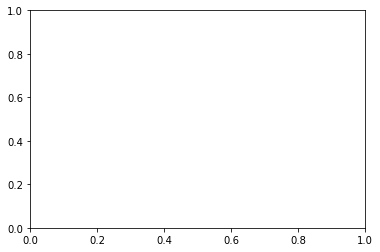

In [14]:
fig = beam1.subsystem_long.plot('soundspeed_group')

Let's check the modal density of longitudinal waves in the first beam.

In [ ]:
fig = beam1.subsystem_long.plot('modal_density')

The modal density increases with frequency.. The modal density of bending waves however remains constant on a logarithmic scale.

In [ ]:
fig = beam1.subsystem_bend.plot('modal_density')

Now, let's connect the two beams with their tips.

In [ ]:
connection1 = system1.addConnection('connection1', 'Connection', shape='Point')
connection1.addComponent(beam1, 'corner')
connection1.addComponent(beam2, 'corner')

In [ ]:
for i in system1.connections:
    print(i)

Indeed, the connection we just made has connects two components.

In [ ]:
print((len(connection1.components)))

In [ ]:
from weakref import WeakValueDictionary

d = WeakValueDictionary()

d['beam1'] = system1._objects[1]
d['material'] = system1._objects[0]
print(len(d))

system1.removeObject('beam1')

print(len(d))

## Solving the system

Now that the entire system is set up we can solve for the modal powers.

In [ ]:
system1.solveSystem()

An indicator is present to show whether the system was solved. Note however that changes made in the model since solving the system do NOT change the value of this indicator.

In [ ]:
print(system1.solved)

## Plotting results

We can now plot the velocity levels in the components

In [ ]:
fig = beam1.plot('velocity_level')

    ###subsystem2.plot_velocity_level('velocity_level_subsystem2.png')
       
    ###"""Or the velocity levels in the components, which is given by a summation over its related subsystems."""
    ###beam1.plot_velocity_level('velocity_level_beam1.png')
    ###beam2.plot_velocity_level('velocity_level_beam2.png')    
    ###"""Since we included only one subsystem per component, the results are the same."""

and/or subsystems.

In [ ]:
fig = beam1.subsystem_bend.plot('velocity_level')